# Milestone 3: spectral graph theory

[EPFL LTS2](https://lts2.epfl.ch)

## Students

* Team: `<52>`
* Students: `<Reza Hosseini, Jawwad Ahmed, Miguel Gómez, Emmanouil Jacovides>`
* Dataset: `<Free Music Archive dataset>`

## Objective

The goal of this milestone is to use the graph Laplacian and its spectral decomposition for extracting information about the graph.

## 0 Load your network

In [2]:
%matplotlib inline

If you get a `No module named 'sklearn'` error when running the below cell, install [scikit-learn](https://scikit-learn.org) with `conda install scikit-learn` (after activating the `ntds_2018` environment).

In [1]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import seaborn as sns
sns.set()

In [3]:
plt.rcParams['figure.figsize'] = (16, 8)

Let's denote your graph as $\mathcal{G} = (\mathcal{V}, \mathcal{E}, A)$, where $\mathcal{V}$ is the set of nodes, $\mathcal{E}$ is the set of edges, $A \in \mathbb{R}^{N \times N}$ is the (weighted) adjacency matrix, and $N = |\mathcal{V}|$ is the number of nodes.

Import the adjacency matrix $A$ that you constructed in the first milestone.
(You're allowed to update it between milestones if you want to.)

In [4]:
# Importing the adjacency matrix that was created in the Milestone 1

adjacency =  np.load('adjacency.npy') # the adjacency matrix
n_nodes =  adjacency.shape[0] # the number of nodes in the network

# Getting the indices of upper triangle of the matrix
up_tri_idx = np.triu_indices(n_nodes)

# Counting the number of non-zero values in upper trianle of adjacency matrix which corresponds to number of edges
n_edges =  np.sum(adjacency[up_tri_idx]!=0) 

# Checking the results
print('\n Shape of adjacency matrix:', adjacency.shape, '\n\n unique values:', np.unique(adjacency))
print('\n Number of nodes real graph: ', n_nodes, '\n Number edges real graph: ' ,n_edges)


 Shape of adjacency matrix: (2000, 2000) 

 unique values: [0.         0.47365592 0.474212   ... 0.9996864  0.99999988 1.        ]

 Number of nodes real graph:  2000 
 Number edges real graph:  69485


In [5]:
# Graph G, Set of Nodes V, set of Edges E, Adjacency A.
A = adjacency

## 1 Graph Laplacian

### Question 1

From the (weighted) adjacency matrix $A$, compute both the combinatorial (also called unnormalized) and the normalized graph Laplacian matrices.

Note: if your graph is weighted, use the weighted adjacency matrix. If not, use the binary adjacency matrix.

For efficient storage and computation, store these sparse matrices in a [compressed sparse row (CSR) format](https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_.28CSR.2C_CRS_or_Yale_format.29).

In [6]:
def degree(adjacency):
    """Computes the degrees for all nodes in a adjacency matrix
    
    Parameters
    ----------
    adjacency: np.array
        Adjacency matrix of the graph.
    
    Returns
    -------
    degree_mat: np.array
        Degrees of all nodes.
    """
    
    # The rows are summed up to obtain the degree for each of the nodes
    degree_mat = np.array([np.sum(e) for e in adjacency.T])
    return degree_mat

In [7]:
# Computing the degree matrix D
degrees = degree(A)
D = np.diag(degrees)
print('\n The size of degree matrix is:', np.size(D))
print('\n The number of non-zeros is:', np.count_nonzero(D))
print('\nD:\n',D)


 The size of degree matrix is: 4000000

 The number of non-zeros is: 2000

D:
 [[38.79135544  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         32.63643572  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         57.40852942 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 61.72297704  0.
   0.        ]
 [ 0.          0.          0.         ...  0.         38.28390586
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  63.16473415]]


In [8]:
# Computing the unnormalized and the normalized graph Laplacian matrices

#unnormalized Laplacian matrix D - A
laplacian_combinatorial = np.subtract(D, A) 

#Computing the matrix D^-0.5
D_sqrt = np.linalg.inv(scipy.linalg.sqrtm(D)) 

#normalized Laplacian matrix D^(-0.5) * L * D^(-0.5)
laplacian_normalized = D_sqrt @ laplacian_combinatorial @ D_sqrt 
laplacian_normalized

array([[ 1.       , -0.0198467,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [-0.0198467,  1.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  1.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  1.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  1.       ,
        -0.0135171],
       [ 0.       ,  0.       ,  0.       , ...,  0.       , -0.0135171,
         1.       ]])

Use one of them as the graph Laplacian $L$ for the rest of the milestone.
We however encourage you to run the code with both to get a sense of the difference!

In [9]:
# Checking the output of Laplacian combinatorial

print('\n The size of the laplacian_combinatorial is:', np.size(laplacian_combinatorial))
print('\n The number of non-zeros is:', np.count_nonzero(laplacian_combinatorial))
print('\n Laplacian Combinatorial:\n ',laplacian_combinatorial)

# Checking the output of Laplacian normalized

print('\n The size of the laplacian_normalized is:', np.size(laplacian_normalized))
print('\n The number of non-zeros is:', np.count_nonzero(laplacian_normalized))
print('\n Laplacian Normalized:\n ',laplacian_normalized)


 The size of the laplacian_combinatorial is: 4000000

 The number of non-zeros is: 140970

 Laplacian Combinatorial:
  [[38.79135544 -0.70616672  0.         ...  0.          0.
   0.        ]
 [-0.70616672 32.63643572  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         57.40852942 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 61.72297704  0.
   0.        ]
 [ 0.          0.          0.         ...  0.         38.28390586
  -0.66470484]
 [ 0.          0.          0.         ...  0.         -0.66470484
  63.16473415]]

 The size of the laplacian_normalized is: 4000000

 The number of non-zeros is: 140970

 Laplacian Normalized:
  [[ 1.        -0.0198467  0.        ...  0.         0.         0.       ]
 [-0.0198467  1.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         1.        ...  0.         0.         0.       ]
 ...
 [ 0.         0.         0.        ...  1.         0.         0.       ]
 [ 0.    

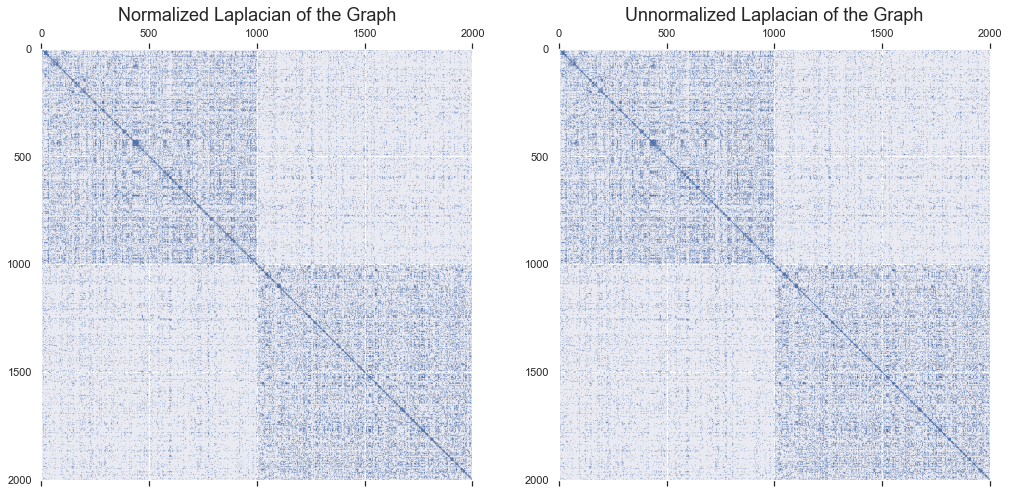

In [10]:
# Checking the outputs for each of the two computed matrices

fix, axes = plt.subplots(1, 2, figsize=(17, 8))
axes[0].spy(laplacian_normalized, markersize=0.05)
axes[0].set_title('Normalized Laplacian of the Graph', fontsize=18)
axes[1].spy(laplacian_combinatorial, markersize=0.05)
axes[1].set_title('Unnormalized Laplacian of the Graph', fontsize=18)
plt.show()

In [11]:
# Converting the laplacian into compressed sparsed matrices
laplacian_norm_sparse= sparse.csr_matrix(laplacian_normalized)
laplacian_comb_sparse = sparse.csr_matrix(laplacian_combinatorial)

In [12]:
# We will use the normalized laplacian for our graph (since it's a weighted graph) as recommended during the lectures.
laplacian = laplacian_norm_sparse


### Question 2

Compute the eigendecomposition of the Laplacian $L = U^\top \Lambda U$, where the columns $u_k \in \mathbb{R}^N$ of $U = [u_1, \dots, u_N] \in \mathbb{R}^{N \times N}$ are the eigenvectors and the diagonal elements $\lambda_k = \Lambda_{kk}$ are the corresponding eigenvalues.

Make sure that the eigenvalues are ordered, i.e., $0 = \lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_N$.

In [13]:
# Computing the eigenvalues and eigenvectors for the normalized Laplacian
# with scipy.linalg.eig

eigenvaluesNor, eigenvectorsNor = scipy.linalg.eig(laplacian_normalized)

# Only keeping the real part of eigenvalues
eigenvaluesNor = np.real(eigenvaluesNor)

# Sorting the values
idx = eigenvaluesNor.argsort() 
eigenvaluesNor = eigenvaluesNor[idx]
eigenvectorsNor = eigenvectorsNor[:,idx]

In [14]:
# Re-ordering the degree matrix, since we will need it in Question 11
D_reor = D[:,idx][idx,:]
D_reor

array([[38.79135544,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 32.63643572,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 57.40852942, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 37.55450272,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        38.8092645 ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 48.03871208]])

In [15]:
# Computing the eigenvalues and eigenvectors for the unnormalized laplacian 
# with scipy.linalg.eig

eigenvaluesUnNor, eigenvectorsUnNor = scipy.linalg.eig(laplacian_combinatorial)

# Only keeping the real part of eigenvalues
eigenvaluesUnNor = np.real(eigenvaluesUnNor)

# Sorting the values
idx = eigenvaluesUnNor.argsort() 
eigenvaluesUnNor = eigenvaluesUnNor[idx]
eigenvectorsUnNor = eigenvectorsUnNor[:,idx]

In [16]:
# Using the eigenvectors and eigenvalues from "Normalized Laplacian" (as we explained earlier since we have weighted matrix)
eigenvectors = eigenvectorsNor
eigenvalues = eigenvaluesNor 

# Make sure that we captured the whole eigenvectors
assert eigenvectors.shape == (n_nodes, n_nodes)

In [17]:
print('\n Eigenvalues: \n',eigenvalues)
print('\n The number of eigenvalues is:', np.size(eigenvalues))


 Eigenvalues: 
 [1.48548651e-16 1.27773355e-01 2.26032020e-01 ... 1.17873694e+00
 1.17963068e+00 1.18139497e+00]

 The number of eigenvalues is: 2000


In [18]:
print('\n Eigenvectors: \n', eigenvectors)
print('\n The number of eigenvector is:', np.size(eigenvalues))


 Eigenvectors: 
 [[ 0.02049852  0.01435214 -0.00380092 ... -0.03749724 -0.04067854
   0.03288907]
 [ 0.0188021   0.01715669 -0.00279927 ...  0.00961644 -0.0376258
  -0.03095869]
 [ 0.02493694  0.02943549  0.0145131  ...  0.00117474 -0.01322593
  -0.01008989]
 ...
 [ 0.02585702 -0.02374078 -0.03435447 ... -0.01848393  0.00501842
  -0.01895336]
 [ 0.020364   -0.01311369  0.03284598 ... -0.02898035  0.01341295
   0.01000802]
 [ 0.02615726  0.01065203  0.0558318  ... -0.00575237  0.02670869
   0.01323348]]

 The number of eigenvector is: 2000


Justify your choice of eigensolver.

**Answer:**
<br>Since the condition that k must be smaller than `N-1` it is not possible to compute all the eigenvalues and associated eigenvectors of a matrix using Sparse matrices, hence we will use the Scipy with normal laplacian matrices (not sparsed ones) to calculate all the eigenvectors.

### Question 3

We can write $L = S S^\top$. What is the matrix $S$? What does $S^\top x$, with $x \in \mathbb{R}^N$, compute?

**Answer:**
<br>The matrix S is the incidence matrix, which is in general a rectangular matrix S(i,j) `[N x E]` where `N` represents the number of nodes and `E` represents the number of edges. The incidence matrix S has been defined as +1, -1 depending on the edges that connect two vertices or 0 otherwise.
<br>Considering that x is a signal vector, $S^T * x$ computes for each edge of the matrix, the derivative of x in the direction of the edge, so $\left ( S^{T}x \right )_{\left ( j \right )}$ gives `x(i)-x(j)` along edge `j`. Therefore it is computing a vector of directional derivatives.

### Question 4

Show that $\lambda_k = \| S^\top u_k \|_2^2$, where $\| \cdot \|_2^2$ denotes the squared Euclidean norm (a.k.a. squared $L^2$ norm).

**Answer:**

The squared eclidean norm also known as $L^2$ norm on a *n-dimentional* space is defined as: $\left \| p \right \|_{2}^{2} = \sum_{i=1}^{n}p_{i}^{2}$

For any laplacian of a weighted matrix $G = (V, E, w)$ we can write: $x^{T}Lx=\sum_{(u,v)\in E}w_{(u,v)}(x_{u}-x_{v})^{2}$

So, for an eigenvector $u_{k}$ of an eigenvalue $\lambda _{k}$ this tells us: $u_{k}^{T}Lu_{k}=\lambda_{k} u_{k}^{T}u_{k}=\left | u_{k}^{2} \right |\lambda$

By defining unit-norm eigenvectors: $\left | u_{k}^{2} \right |=1$, then we will have: $u_{k}^{T}Lu_{k}=\lambda_{k}$

In lectures, we have seen that a laplacian also equals to: $L=SS^{T}$. Then, we can rewrite the above equation as below:

$\lambda_{k}=u_{k}^{T}L u_{k}=u_{k}^{T}S S^{T}u_{k}=\left ( S^{T}u_{k}\right ) ^{T} \cdot \left ( S^{T}u_{k} \right )$

And by definition of $L^{2}$ we know that: $\left ( S^{T}u_{k}\right ) ^{T} \cdot \left ( S^{T}u_{k} \right )=\left \| S^{T}u_{k}\right \|_{2}^{2}$

Thus: $\lambda _{k}=\left \| S^{T}u_{k}\right \|_{2}^{2}$


What does the quantity $\| S^\top x \|_2^2$ tell us about $x$?

**Answer:**

$f = S^T x$ shows the derivative of x

$\| S^\top x \|2^2 = \sum{i}^{n} f(i) $ gives a measurement of the strength of the derivative. If the strength is high, it shows that the function x has a lot of variation. On the contrary, if it is low, the function has not much variation.

In other words,  $\| S^\top x \|_2^2 $  gives a measure of the smoothness of x along the different vertices.

### Question 5

What is the value of $u_0$, both for the combinatorial and normalized Laplacians?

In [19]:
#Printing the eigenvectors u_0
print('\n The u_0 for the normalized laplacian is:\n', eigenvectorsNor[0])
print('\n The u_0 for the unnormalized laplacian is:\n', eigenvectorsUnNor[0])


 The u_0 for the normalized laplacian is:
 [ 0.02049852  0.01435214 -0.00380092 ... -0.03749724 -0.04067854
  0.03288907]

 The u_0 for the unnormalized laplacian is:
 [-0.02236068 -0.01841359 -0.00416474 ...  0.00031745  0.00043482
 -0.00025183]


In [20]:
#Printing the eigenvalues of u_0
print('\n The eigenvalue of u_0 for the normalized laplacian is:\n', eigenvaluesNor[0])
print('\n The eigenvalue of u_0 for the unnormalized laplacian is:\n', eigenvaluesUnNor[0])


 The eigenvalue of u_0 for the normalized laplacian is:
 1.4854865101801712e-16

 The eigenvalue of u_0 for the unnormalized laplacian is:
 7.105444068707002e-14


**Discussion:**

In theory the eigenvalue of $u_0$ is 0. In the normalized laplacian and unnormalized laplacian we can check that the values are not actually zero exacty in reality but they are very small values in the order of magnite of $x^{-15}$, which can be considered as zero. We can check that with the following code:

In [21]:
# Checking if the values of zero eigenvalue is equal to zero
if not np.allclose(eigenvaluesNor[0], 0.0):
    print('u_0 for normalized laplacian is not zero!')
    
if not np.allclose(eigenvaluesUnNor[0], 0.0):
    print('u_0 for unnormalized laplacian is not zero!')

### Question 6

Look at the spectrum of the Laplacian by plotting the eigenvalues.
Comment on what you observe.

The second eigenvalue is 0.12777335488043057
The largest normalized eigenvalue in our graph is: 1.1814


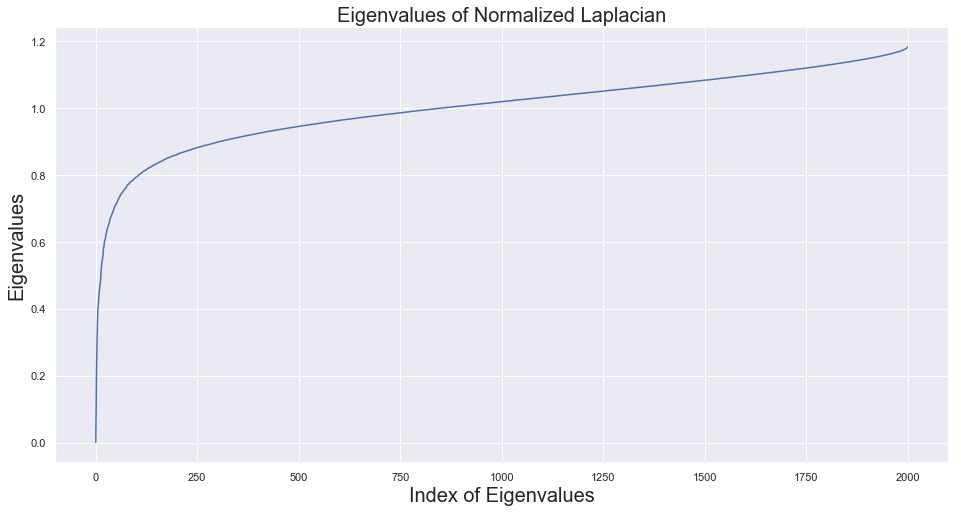

In [22]:
# Ploting the eigenvalues for the normalized Laplacian
print("The second eigenvalue is {}".format(eigenvaluesNor[1]))
print('The largest normalized eigenvalue in our graph is: {}'.format(np.around(np.max(eigenvaluesNor), decimals=4)))

plt.plot(eigenvaluesNor, markersize = 5)
plt.ylabel('Eigenvalues', fontsize=20)
plt.xlabel('Index of Eigenvalues', fontsize=20)
plt.title('Eigenvalues of Normalized Laplacian', fontsize=20)
plt.show()

** **

The second eigenvalue is 6.543344837278797
The largest unnormalized eigenvalue in our graph is: 169.1799


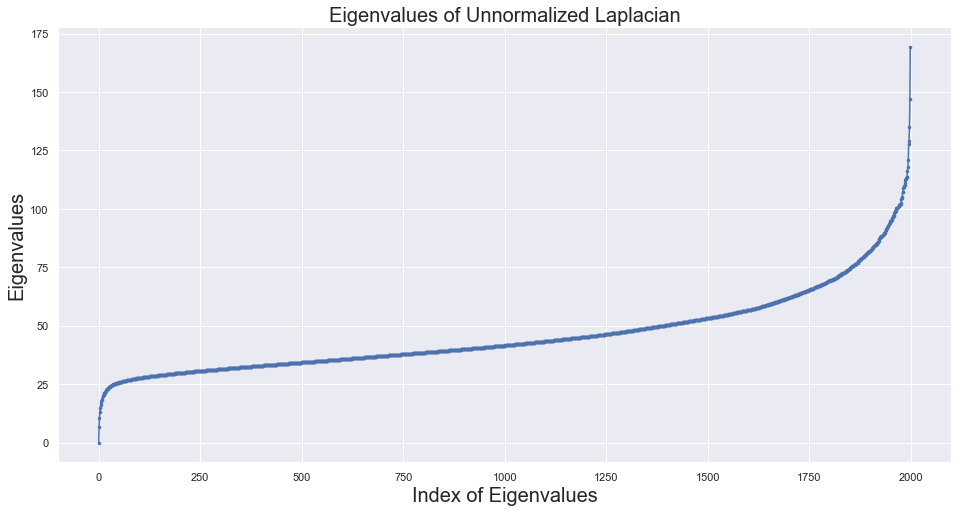

In [23]:
# Ploting the eigenvalues for the unnormalized Laplacian
print("The second eigenvalue is {}".format(eigenvaluesUnNor[1]))
print('The largest unnormalized eigenvalue in our graph is: {}'.format(np.around(np.max(eigenvaluesUnNor), decimals=4)))
plt.plot(eigenvaluesUnNor, '.-', markersize = 5)
plt.ylabel('Eigenvalues', fontsize=20)
plt.xlabel('Index of Eigenvalues', fontsize=20)
plt.title('Eigenvalues of Unnormalized Laplacian', fontsize=20)
plt.show()

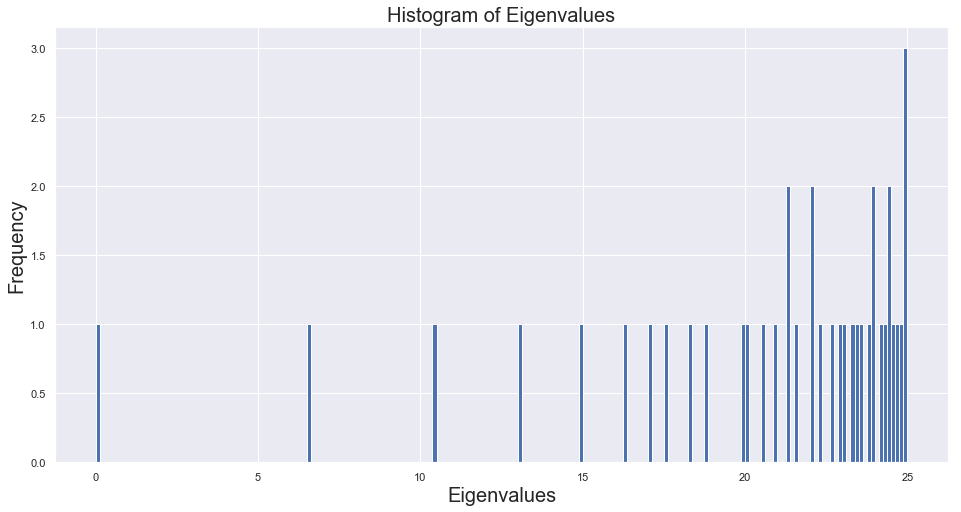

In [24]:
plt.hist(eigenvaluesUnNor, bins=200, range=[0, 25])
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Eigenvalues', fontsize=20)
plt.title('Histogram of Eigenvalues', fontsize=20)
plt.show()

**Discussion:**

From the histogram above, where we have the eigenvalues on x-axis and their frequency on the y_axis, by looking into the gaps, we can infere approximately the number of clusters. 

From the lectures, we know that by looking into the gaps, we can decide on the approximate number of k clusters that we can divide our graph into. So, there are either 2, 3, or 4 clusters. We will investigate them later by using different `k` for clustering.

We had expect to see one major gap which then would show the existence of two different clusters (given the fact that we had two genres 'Hiphop' and 'Rock). But here we can see *three* big gaps. <br>This could be caused by our sparsifying step in the first milestone, where we were constructing the adjacency matrix and only kept the first 50 strongest edges (maybe instead of keeping a constant number of edges, it was better to put a threshold and below that threshold we removed the edges), or the fact that looking into genres alone is not a good way to classify different musics.

**Question:** How many connected components are there in your graph? Answer using the eigenvalues only.

**Answer:** Since the second smallest eigenvalue is not zero, there is only one component in the graph (the graph is fully connected).

**Question:** Is there an upper bound on the eigenvalues, i.e., what is the largest possible eigenvalue? Answer for both the combinatorial and normalized Laplacians.

In [25]:
idx = degrees.argsort()
sorted_degree = degrees[idx]
D = np.diag(degrees)
print('The two largest degrees: {}'.format(sorted_degree[-2:]))
print('The upper bound from Anderson-Morley: {}'.format(sorted_degree[-2]+sorted_degree[-1]))
print()
print('The largest unnormalized eigenvalue in our graph is: {}'.format(np.around(np.max(eigenvaluesUnNor), decimals=4)))
print('The largest normalized eigenvalue in our graph is: {}'.format(np.around(np.max(eigenvaluesNor), decimals=4)))

The two largest degrees: [145.94776034 168.27643182]
The upper bound from Anderson-Morley: 314.2241921586238

The largest unnormalized eigenvalue in our graph is: 169.1799
The largest normalized eigenvalue in our graph is: 1.1814


**Answer:** 

1. *Unnormalized laplacian*: 
<br>The largest eigenvalue is `169.2`. Since there is a finite number of eigenvalues for a laplacian (the maximum is equal to number of rows or column), and each eigenvalues has a finite value, therefore ther must exist an upper bound for each laplacian. However, from the plotted graph for unnormalized laplacian, the upper bound is inconclusive (we cannot see the converging). <br> From Anderson & Morley $^{[1]}$ , we know that the maximum eigenvalue satisfies the following equation:
$\lambda _{n}\leq max\left \{ d(u)+d(v):u,v\in E \right \}$. <br>
From the above result we know that the upper bound should be `314.2`.
[^1]:The first paragraph of the definition.


2. *Normalized Laplacian*: 
<br>The largest eigenvalues is `1.18`. From the theory point-of-view, we know there exists an upper bound on the eigenvalues for the normalized Laplacian, which is equal to `2.0` (when the graph is biparticle).

$_{[1]: Anderson, W.N., Morley, T.D.: Eigenvalues of the Laplacian of a graph, Linear and Multilinear Algebra 18, 141–145 (1985)}$

## 3 Laplacian eigenmaps

*Laplacian eigenmaps* is a method to embed a graph $\mathcal{G}$ in a $d$-dimensional Euclidean space.
That is, it associates a vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$.
The graph $\mathcal{G}$ is thus embedded as $Z \in \mathbb{R}^{N \times d}$.

### Question 7

What do we use Laplacian eigenmaps for? (Or more generally, graph embeddings.)

**Answer:** The Laplacian eigenmaps are used to project a network from a high dimensional space (N dimensions) into a lower dimensional space, e.g. 2D to be able to visualize it. The goal is to project information of the network into a lower dimension that is posible to visualize, without losing much important information about the original graph when doing this projection.

The idea here is that nodes that are close to each other (high weights) at N dimensional space should also be close to each other at lower dimensions and vice versa.

### Question 8

Embed your graph in $d=2$ dimensions with Laplacian eigenmaps.
Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.

**Recompute** the eigenvectors you need with a partial eigendecomposition method for sparse matrices.
When $k \ll N$ eigenvectors are needed, partial eigendecompositions are much more efficient than complete eigendecompositions.
A partial eigendecomposition scales as $\Omega(k |\mathcal{E}|$), while a complete eigendecomposition costs $\mathcal{O}(N^3)$ operations.

**Answer:**
<br>Here, we will use Spares matrices as only need to compute the first *`k`* eignevectors (not all of them).

In [26]:
# Doing a partial eigendecomposition for k = 20 << N by using sparse.linalg.eigsh
# Calculating the eigenvalue decomposition of normalized laplacian
eigenvalues_k, eigenvectors_k = sparse.linalg.eigsh(laplacian, which ='SM', k = 20)

# Sorting the eigenvalues
idx = eigenvalues_k.argsort() 
eigenvalues_k = eigenvalues_k[idx]
eigenvectors_k = eigenvectors_k[:,idx]

# Choosing the new eigenvalues and eigenvectors for k = 20 for the rest of the Milestone
eigenvalues = eigenvalues_k
eigenvectors = eigenvectors_k

print('\n The type of eigenvalues is:', type(eigenvalues))
print('\n The type of eigenvectors is:', type(eigenvectors))
print('\n Eigenshape:',eigenvectors.shape)
print('\n Eigenvalues:\n',eigenvalues)
print('\n Eigenvector:\n',eigenvectors)


 The type of eigenvalues is: <class 'numpy.ndarray'>

 The type of eigenvectors is: <class 'numpy.ndarray'>

 Eigenshape: (2000, 20)

 Eigenvalues:
 [-1.14710157e-16  1.27773355e-01  2.26032020e-01  2.99044449e-01
  3.48427882e-01  3.96732149e-01  4.07137156e-01  4.25131468e-01
  4.42529259e-01  4.54590523e-01  4.69966270e-01  4.75904873e-01
  4.86734727e-01  5.11686969e-01  5.25071233e-01  5.39169223e-01
  5.41018578e-01  5.54703276e-01  5.60942974e-01  5.81740894e-01]

 Eigenvector:
 [[-0.02049852  0.01435214  0.00380092 ...  0.08356386 -0.01665147
  -0.01362131]
 [-0.0188021   0.01715669  0.00279927 ...  0.02464219 -0.00615526
   0.00034195]
 [-0.02493694  0.02943549 -0.0145131  ...  0.00645749  0.00690564
  -0.00654626]
 ...
 [-0.02585702 -0.02374078  0.03435447 ...  0.00438661  0.05766109
   0.01737524]
 [-0.020364   -0.01311369 -0.03284598 ...  0.02244004  0.00057382
   0.01520528]
 [-0.02615726  0.01065203 -0.0558318  ...  0.03273102  0.02051255
   0.00520762]]


**Question:** Plot the nodes embedded in 2D. Comment on what you see.

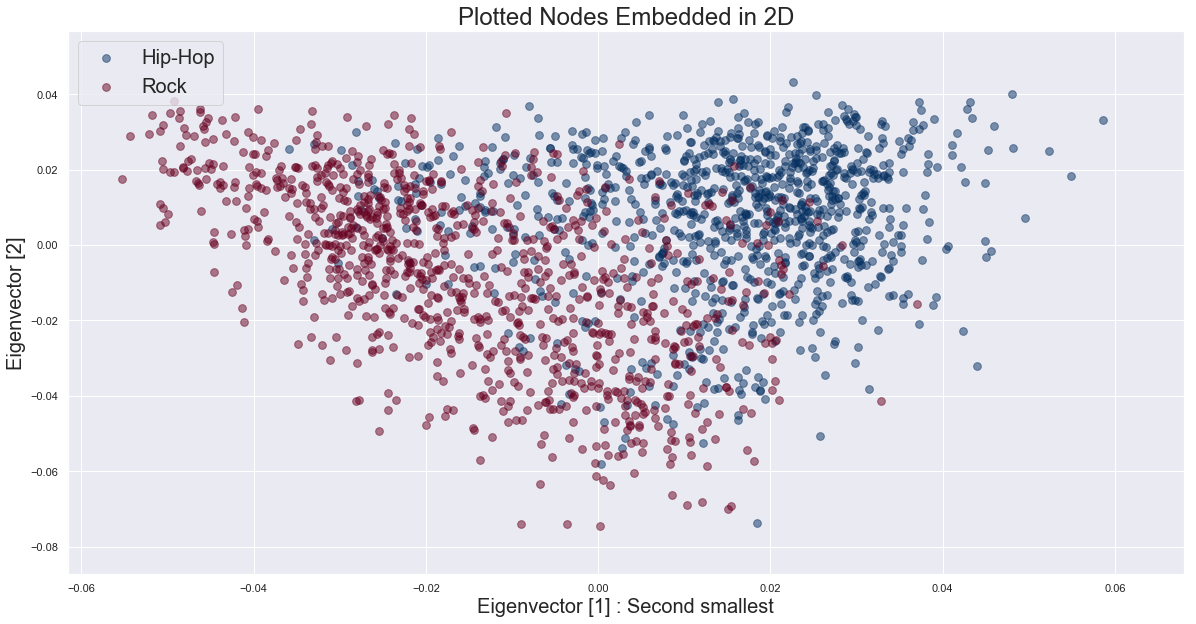

In [28]:
# From previous milestones we already know that the first 1000 nodes 
# are Hip-hop tracks while the last 1000 nodes are Rock tracks

from pylab import *
#Getting Color codes
color_codes =[]
cmap = cm.get_cmap('RdBu', 2)
for i in range(cmap.N):
    rgb = cmap(i)[:3] 
    color_codes.append(str(matplotlib.colors.rgb2hex(rgb)))

xHH = eigenvectors[0:999,1]# Your code here.
yHH = eigenvectors[0:999,2]# Your code here.

xR= eigenvectors[1000:1999,1]# Your code here.
yR= eigenvectors[1000:1999,2]# Your code here.

#plt.scatter(x, y, color='Red', xbis, ybis, color='Blue');
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

ax1.scatter(xHH, yHH, c=color_codes[1], s=60, alpha=0.5, label='Hip-Hop') #blue
ax1.scatter(xR,yR, c=color_codes[0], s=60, alpha=0.5, label='Rock') #red
plt.xlabel('Eigenvector [1] : Second smallest', fontsize=20)
plt.ylabel('Eigenvector [2]', fontsize=20)
plt.legend(loc='upper left', fontsize=20) # using a size in points
plt.title('Plotted Nodes Embedded in 2D', fontsize=24)
plt.show()

**Discussion:** 
<br>From the visualized Laplacian eigenmaps, it can be seen that on the right side, the data points are mostly blue, which corresponds to Hip-hop songs, and on the left side, the points are mainly red, which corresponds to the Rock songs.
Thus, in this representation of the 2D laplacian eigenmaps, we can observe the nice clustering of our data into two clusters of Rock and Hip-Hop.

### Question 9

What does the embedding $Z \in \mathbb{R}^{N \times d}$ preserve?

**Answer:** 
<br>Dimentionality reduction with laplacian eigenmaps preserves the distance property between points. It means that points that are close to each other in high dimension, should also be close to each other in lower dimension, and vice versa. 
<br>Laplacian eigenmaps also optimally preserves local neighborhood information in a certain sense. This characteristic makes it relatively insensitive to outliers and noise, which is a desired property.

## 2 Spectral clustering

*Spectral clustering* is a method to partition a graph into distinct clusters.
The method associates a feature vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$, then runs [$k$-means](https://en.wikipedia.org/wiki/K-means_clustering) in the embedding space $\mathbb{R}^d$ to assign each node $v_i \in \mathcal{V}$ to a cluster $c_j \in \mathcal{C}$, where $k = |\mathcal{C}|$ is the number of desired clusters.

### Question 10

Choose $k$ and $d$. How did you get to those numbers?

**Answer:**
1. Choosing *`k`*:
<br>By analyzing the eigenvalues of the Laplacian one could deduce the number of clusters and therefore choose an appropiate k. 
<br>Considering our data, we checked that there is one connected graph with a second eigenvalue $\lambda_2 >> 0$. We have two defined components in the graph which would be the ones corresponding to Hip-Hop and Rock songs. Therefore we chose k = 2 to find the two different clusters.

2. Choosing *`d`*:
<br>Since our real graph has high-dimensionality as the dimensions are related to the number of features our audio tracks possess, we cannot obtain any conclusive visualization of such a high dimensional space. Thus, we want to embed our graph in a reduced dimensionsionality (2 or 3 dimensions), which allows us to represent our graph in a more familiar space. Therefore, we use a dimensionality d = 2.
<br> For using K-means algorithm later on to cluster into k=3, we will use d=5 for having more information for doing the optimal clustering.

### Question 11

1. Embed your graph in $\mathbb{R}^d$ as $Z \in \mathbb{R}^{N \times d}$.
   Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.
1. If you want $k=2$ clusters, partition with the Fiedler vector. For $k > 2$ clusters, run $k$-means on $Z$. Don't implement $k$-means, use the `KMeans` class imported from scikit-learn.

**Answers:**
#### 1. Part 1:
    
##### 1.1. Embed in d dimension with re-normalizing the eigenvectors by the degrees.
<br>Here, we will use the normalized laplacian matrix to compute the eigenvectors. Then, for the first part we will re-normalize the eigenvectors by the degrees.

In [29]:
# Computing the eigenvalues and eigenvectors for the normalized Laplacian
H_val, H =  sparse.linalg.eigsh(laplacian, which='SM', k=10)

# Only keeping the real part of eigenvalues
H_val = np.real(H_val)

# Getting the Sorted index for sorting the eigenvectors later on
idx = H_val.argsort()

**Re-normalizing:**
<br> The formula for re-normalization with respect to degree is: $F=D^{1/2}H$
Since here we only have the 10 first eigenvectors, we will use the sorted degree matrix *`D`*.

In [30]:
# Re-normalizing the eigenvectors to the degrees
H_norm = (np.matmul(np.power(D_reor[:10,:10], 0.5), H.T)).T

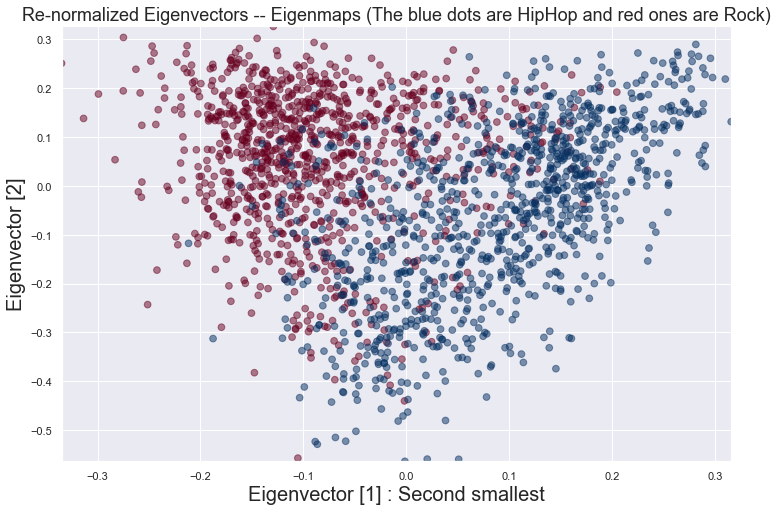

In [31]:
x = H_norm[:,1]
y = H_norm[:,2]
labels=np.r_[np.zeros((1000,)), np.ones((1000,))]
fig,ax=plt.subplots(1,1,figsize=(12,8))
ax.scatter(x, y, c=labels, cmap='RdBu', s=45, alpha=0.5)
ax.set_ylim([np.min(y),np.max(y)])
ax.set_xlim([np.min(x),np.max(x)])
ax.set_title('Re-normalized Eigenvectors -- Eigenmaps (The blue dots are HipHop and red ones are Rock)', fontsize=18)
plt.xlabel('Eigenvector [1] : Second smallest', fontsize=20)
plt.ylabel('Eigenvector [2]', fontsize=20)
plt.show()

#####  1.2. Not Re-normalized Eigenvectors

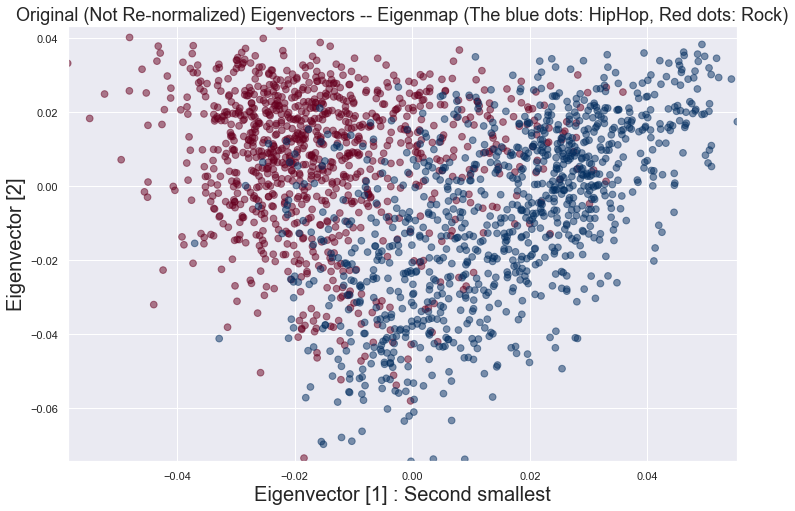

In [32]:
# Plotting the not re-normalized H
x = H[:,1]
y = H[:,2]
labels=np.r_[np.zeros((1000,)), np.ones((1000,))]
fig,ax=plt.subplots(1,1,figsize=(12,8))
ax.scatter(x, y, c=labels, cmap='RdBu', s=45, alpha=0.5)
ax.set_ylim([np.min(y),np.max(y)])
ax.set_xlim([np.min(x),np.max(x)])
ax.set_title('Original (Not Re-normalized) Eigenvectors -- Eigenmap (The blue dots: HipHop, Red dots: Rock)', fontsize=18)
plt.xlabel('Eigenvector [1] : Second smallest', fontsize=20)
plt.ylabel('Eigenvector [2]', fontsize=20)
plt.show()

**Discussion:**
<br>From the above graphs, we can see that the general shape of points will not change by re-normalizing the eigenvectors. However, if we look into actual values of different eigenvectors, we can see that re-normalization caused the value to be in larger range, which could be useful later on when we will use k-means algorithm. 

#### 2. Part two: Clustering:

##### 2.1. For K=2: 
<br>Since we want to cluster into k=2 parts, we will use Fiedler vector. Fiedler vector is the eigenvector corresponding to the second smallest eigenvalue (i.e., the algebraic connectivity) of the Laplacian matrix of a graph G.

In [33]:
# Clustering using Fiedler vector
labels_fid = np.where(eigenvectors[:,1]>0, 0, 1) 

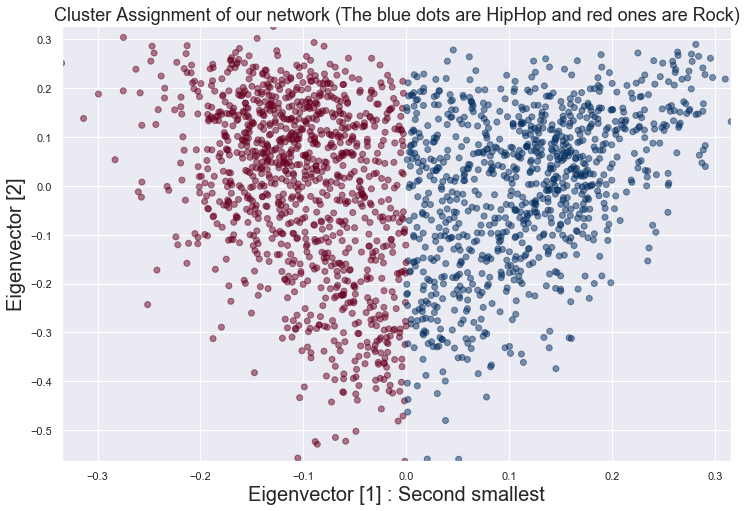

In [34]:
x = H_norm[:,1]
y = H_norm[:,2]

fig,ax=plt.subplots(1,1,figsize=(12,8))
ax.scatter(x, y, c=labels_fid, cmap='RdBu', alpha=0.5)
ax.set_ylim([np.min(y),np.max(y)])
ax.set_xlim([np.min(x),np.max(x)])
ax.set_title('Cluster Assignment of our network (The blue dots are HipHop and red ones are Rock)', fontsize=18)
plt.xlabel('Eigenvector [1] : Second smallest', fontsize=20)
plt.ylabel('Eigenvector [2]', fontsize=20)
plt.show()

##### 2.2. For K=3: 
Here, we use the k-means algorithm from Scikit-learn library. For this step we use *`d=4`* for selecting the eigenvectors.

In [35]:
# Using creating KMeans object and fitting the features (first 4 eigenvectors) 
kmeans = KMeans(n_clusters=3)
kmeans.fit(H_norm[:,1:5])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
# Predicting the labels based on fitted KMeans
labels_k3 = kmeans.predict(H_norm[:,1:5])
np.unique(labels_k3)

array([0, 1, 2])

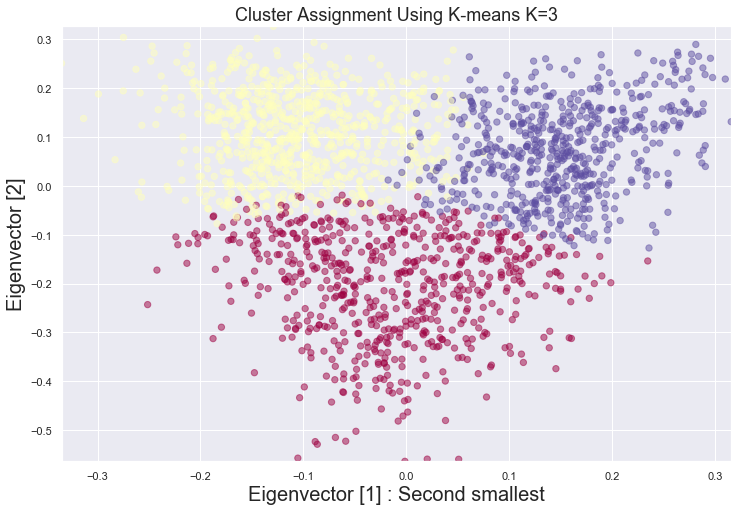

In [37]:
x = H_norm[:,1]
y = H_norm[:,2]

fig,ax=plt.subplots(1,1,figsize=(12,8))
ax.scatter(x, y, c=labels_k3, cmap='Spectral', s=40, alpha=0.5)
ax.set_ylim([np.min(y),np.max(y)])
ax.set_xlim([np.min(x),np.max(x)])
ax.set_title('Cluster Assignment Using K-means K=3', fontsize=18)
plt.xlabel('Eigenvector [1] : Second smallest', fontsize=20)
plt.ylabel('Eigenvector [2]', fontsize=20)
plt.show()

##### 2.3. For K=4: 
Here, we use again the k-means algorithm from Scikit-learn library. For this step we use *`d=4`*

In [38]:
# Using creating KMeans object and fitting the features (first 4 eigenvectors) 
kmeans = KMeans(n_clusters=4)
kmeans.fit(H_norm[:,1:5])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
# Predicting the labels based on fitted KMeans
labels_k4 = kmeans.predict(H_norm[:,1:5])
np.unique(labels_k4)

array([0, 1, 2, 3])

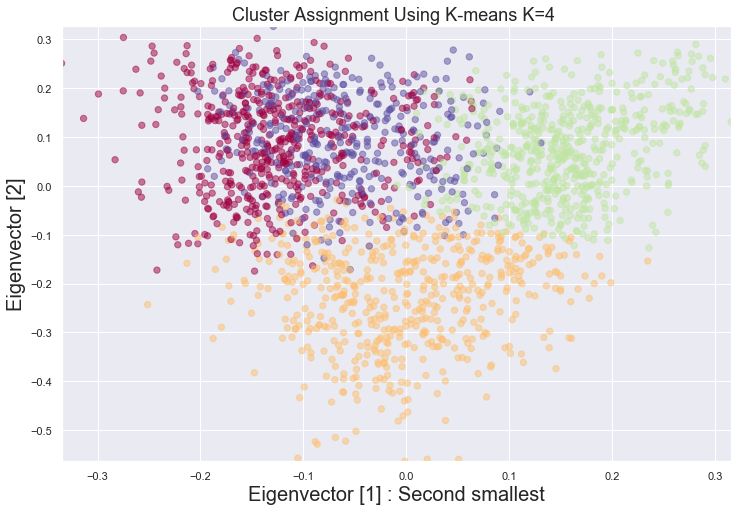

In [40]:
x = H_norm[:,1]
y = H_norm[:,2]

fig,ax=plt.subplots(1,1,figsize=(12,8))
ax.scatter(x, y, c=labels_k4, cmap='Spectral', s=40, alpha=0.5)
ax.set_ylim([np.min(y),np.max(y)])
ax.set_xlim([np.min(x),np.max(x)])
ax.set_title('Cluster Assignment Using K-means K=4 ', fontsize=18)
plt.xlabel('Eigenvector [1] : Second smallest', fontsize=20)
plt.ylabel('Eigenvector [2]', fontsize=20)
plt.show()

### Question 12

Use the computed cluster assignment to reorder the adjacency matrix $A$.
What do you expect? What do you observe?

In [41]:
# Getting the index of sorted labels (to use for sorting adjacency matrix later on)
idx_re = labels_fid.argsort()
idx_k3 = labels_k3.argsort()
idx_k4 = labels_k4.argsort()

# Re-ordering the adjacency matrix
## For doing the reordering, we will reorder once the columns and second time the rows to get the re-ordered matrix
A_re  =A[:,idx_re][idx_re,:]
A_k3 = A[:,idx_k3][idx_k3,:]
A_k4 = A[:,idx_k4][idx_k4,:]

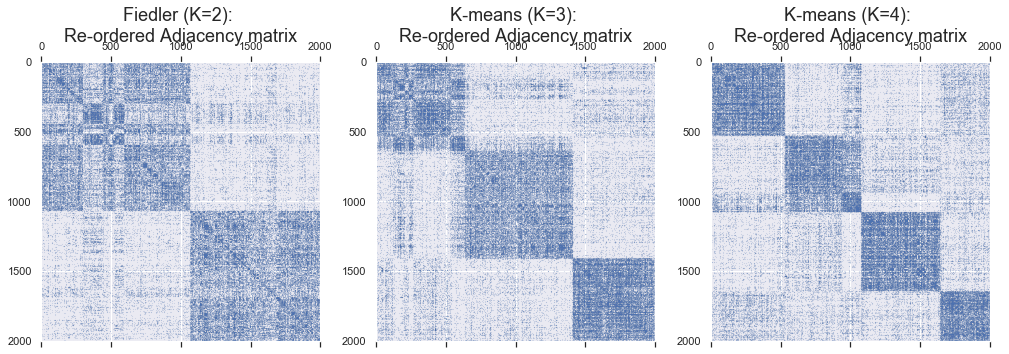

In [42]:
# Plotting the reordered adjacency matrix and normal adjacency matrix
fix, axes = plt.subplots(1, 3, figsize=(17, 9))
axes[0].spy(A_re, markersize=0.05)
axes[0].set_title('Fiedler (K=2): \nRe-ordered Adjacency matrix', fontsize=18)
axes[1].spy(A_k3, markersize=0.05)
axes[1].set_title('K-means (K=3): \nRe-ordered Adjacency matrix', fontsize=18)
axes[2].spy(A_k4, markersize=0.05)
axes[2].set_title('K-means (K=4): \nRe-ordered Adjacency matrix', fontsize=18)
plt.show()

**Discussion:**
<br>From the above graphs, we can see that maybe the best numbers of `k` for classification is either `3` or `4` since for those cases, we can see clear distinct callifications after re-ordering adjacency matrix. Although for `k=2` we still can get a reasonable result.

### Question 13

If you have ground truth clusters for your dataset, compare the cluster assignment from spectral clustering to the ground truth.
A simple quantitative measure is to compute the percentage of nodes that have been correctly categorized.
If you don't have a ground truth, qualitatively assess the quality of the clustering.

Ground truth clusters are the "real clusters".
For example, the genre of musical tracks in FMA, the category of Wikipedia articles, the spammer status of individuals, etc.
Look for the `labels` in the [dataset descriptions](https://github.com/mdeff/ntds_2018/tree/master/projects/README.md).

**Answer:**
<br>For calculating this percentage, since we don't know the ground truth for $k\geq 3$, we only calculate it for the case where we did classification for *`k=2`*.

In [43]:
#Labels we obtained by clustering
Labels = np.where(eigenvectors[:,1] > 0, 1, 0) 

#Ground truth labels
GT = np.r_[np.ones(1000), np.zeros(1000)] 
 
#We compute the difference between the ground truth labels and the labels we obtained by clustering    
Displace = Labels - GT 

#Computing the percentage of nodes that have been correctly categorized
Percentage = np.sum(np.square(Displace))/GT.shape[0]
print("The percentage of nodes that have been correctly categorized is {:.2%}".format(Percentage))

The percentage of nodes that have been correctly categorized is 20.00%


### Question 14

Plot the cluster assignment (one color per cluster) on the 2D embedding you computed above with Laplacian eigenmaps.

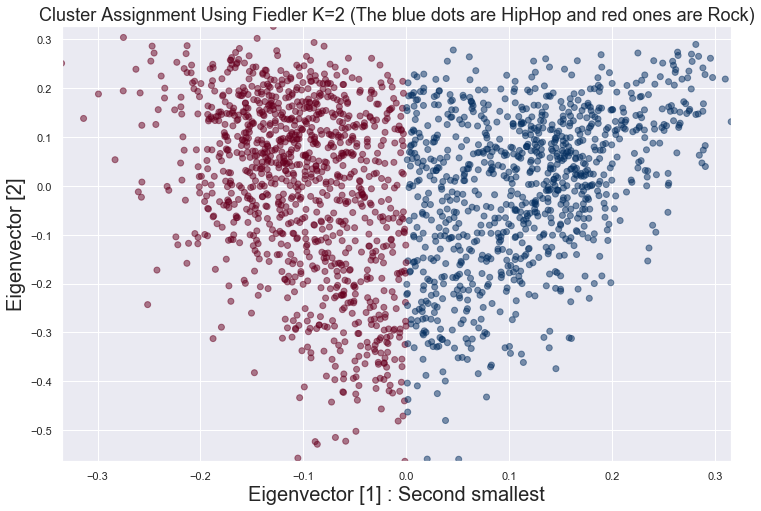

In [44]:
x = H_norm[:,1]
y = H_norm[:,2]

fig,ax=plt.subplots(1,1,figsize=(12,8))
ax.scatter(x, y, c=labels_fid, cmap='RdBu', alpha=0.5)
ax.set_ylim([np.min(y),np.max(y)])
ax.set_xlim([np.min(x),np.max(x)])
plt.xlabel('Eigenvector [1] : Second smallest', fontsize=20)
plt.ylabel('Eigenvector [2]', fontsize=20)
ax.set_title('Cluster Assignment Using Fiedler K=2 (The blue dots are HipHop and red ones are Rock)', fontsize=18)
plt.show()

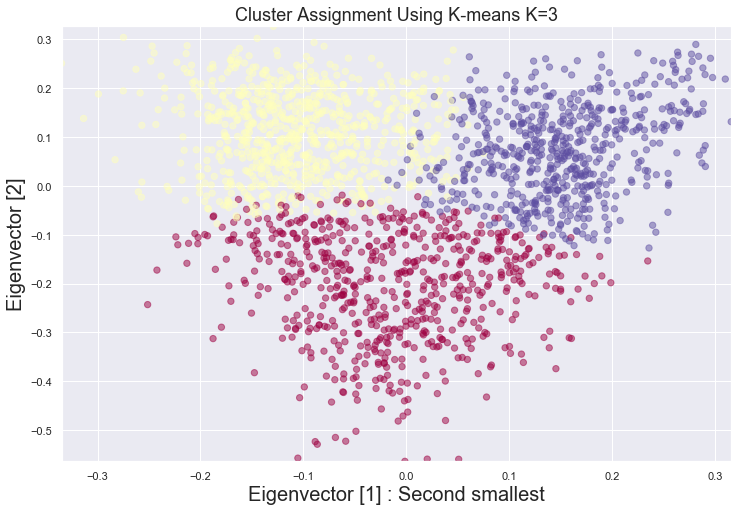

In [45]:
x = H_norm[:,1]
y = H_norm[:,2]

fig,ax=plt.subplots(1,1,figsize=(12,8))
ax.scatter(x, y, c=labels_k3, cmap='Spectral', s=40, alpha=0.5)
ax.set_ylim([np.min(y),np.max(y)])
ax.set_xlim([np.min(x),np.max(x)])
plt.xlabel('Eigenvector [1] : Second smallest', fontsize=20)
plt.ylabel('Eigenvector [2]', fontsize=20)
ax.set_title('Cluster Assignment Using K-means K=3', fontsize=18)
plt.show()

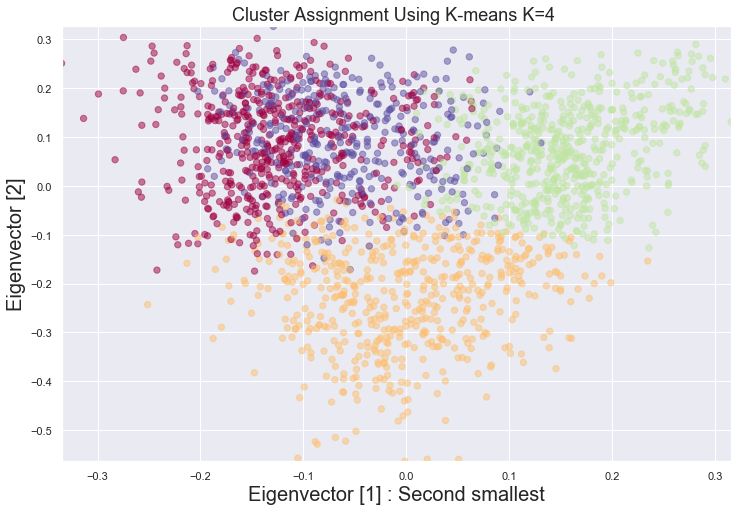

In [46]:
x = H_norm[:,1]
y = H_norm[:,2]

fig,ax=plt.subplots(1,1,figsize=(12,8))
ax.scatter(x, y, c=labels_k4, cmap='Spectral', s=40, alpha=0.5)
ax.set_ylim([np.min(y),np.max(y)])
ax.set_xlim([np.min(x),np.max(x)])
plt.xlabel('Eigenvector [1] : Second smallest', fontsize=20)
plt.ylabel('Eigenvector [2]', fontsize=20)
ax.set_title('Cluster Assignment Using K-means K=4 ', fontsize=18)
plt.show()

### Question 15

Why did we use the eigenvectors of the graph Laplacian as features? Could we use other features for clustering?

**Answer:**
<br>The eigenvectors are a good representation of the real graph and can thus be used as features to study the clustering of the graph by performing spectral clustering, i.e., using the similarity matrix and eigenvectors to perform the dimension reduction for the graph embedding and the clustering.

Other methods that can be used for clustering are: 
- Principle Component Analysis (PCA): Applying PCA on adjacency matrix columns to select the first `k` significant features (with highest variance) which can capture most of the information.
- Isomaps: using geodesic distances as features.
- Kernel PCA: We can apply the kernel trick to the dataset and then compute the PCA for extrracting the most significant dimensions (the ones with the highest variance) as features.